In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

data = [("Wielino", 24, "Programmer", "Gaming", "Laki-laki"), ("Even", 19, "Mahasiswa", "Berjalan", "Laki-laki"), ("Ace", 28, "Streamer", "Live Streaming", "Laki-laki"), ("Guntur", 24, "Guru", "Memasak", "Laki-laki")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

df.show()

+-------+----+----------+--------------+---------+
|   Nama|Usia| Pekerjaan|          Hobi|   Gender|
+-------+----+----------+--------------+---------+
|Wielino|  24|Programmer|        Gaming|Laki-laki|
|   Even|  19| Mahasiswa|      Berjalan|Laki-laki|
|    Ace|  28|  Streamer|Live Streaming|Laki-laki|
| Guntur|  24|      Guru|       Memasak|Laki-laki|
+-------+----+----------+--------------+---------+



In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

data = [("Wielino", 24, "Programmer", "Gaming", "Laki-laki"), ("Even", 19, "Mahasiswa", "Berjalan", "Laki-laki"), ("Ace", 28, "Streamer", "Live Streaming", "Laki-laki"), ("Guntur", 24, "Guru", "Memasak", "Laki-laki")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

df.show()

df_filtered = df.filter(df["Usia"] < 20)
df_filtered.show()

from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

df_shorted = df.orderBy("Usia", ascending=False)
df_shorted.show()

+-------+----+----------+--------------+---------+
|   Nama|Usia| Pekerjaan|          Hobi|   Gender|
+-------+----+----------+--------------+---------+
|Wielino|  24|Programmer|        Gaming|Laki-laki|
|   Even|  19| Mahasiswa|      Berjalan|Laki-laki|
|    Ace|  28|  Streamer|Live Streaming|Laki-laki|
| Guntur|  24|      Guru|       Memasak|Laki-laki|
+-------+----+----------+--------------+---------+

+----+----+---------+--------+---------+
|Nama|Usia|Pekerjaan|    Hobi|   Gender|
+----+----+---------+--------+---------+
|Even|  19|Mahasiswa|Berjalan|Laki-laki|
+----+----+---------+--------+---------+

+---------+
|avg(Usia)|
+---------+
|    23.75|
+---------+

+-------+----+----------+--------------+---------+
|   Nama|Usia| Pekerjaan|          Hobi|   Gender|
+-------+----+----------+--------------+---------+
|    Ace|  28|  Streamer|Live Streaming|Laki-laki|
|Wielino|  24|Programmer|        Gaming|Laki-laki|
| Guntur|  24|      Guru|       Memasak|Laki-laki|
|   Even|  19| Mah

In [12]:
import pandas as pd

data_pandas = {
    "Nama": ["Wielino", "Even", "Ace", "Guntur"],
    "Usia": [24, 19, 28, 24],
    "Pekerjaan": ["Programmer", "Mahasiswa", "Streamer", "Guru"],
    "Hobi": ["Gaming", "Berjalan", "Live Streaming", "Memasak"],
    "Gender": ["Laki-laki", "Laki-laki", "Laki-laki", "Laki-laki"]}
df_pandas = pd.DataFrame(data_pandas)

df_pandas

,Nama,Usia,Pekerjaan,Hobi,Gender
0,Wielino,24,Programmer,Gaming,Laki-laki
1,Even,19,Mahasiswa,Berjalan,Laki-laki
2,Ace,28,Streamer,Live Streaming,Laki-laki
3,Guntur,24,Guru,Memasak,Laki-laki


      Nama  Usia   Pekerjaan
0  Wielino    24  Programmer
1     Even    19   Mahasiswa
2      Ace    28    Streamer
3   Guntur    24        Guru
            Usia
count   4.000000
mean   23.750000
std     3.685557
min    19.000000
25%    22.750000
50%    24.000000
75%    25.000000
max    28.000000


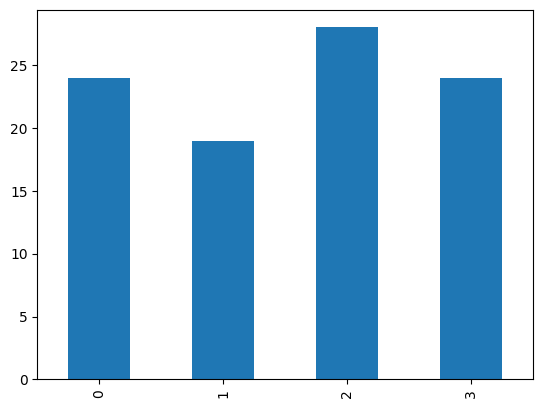

In [14]:
import pandas as pd

data_pandas = {"Nama": ["Wielino", "Even", "Ace", "Guntur"], "Usia": [24, 19, 28, 24]}
df_pandas = pd.DataFrame(data_pandas)

data_pandas_2 = {"Nama": ["Wielino", "Even", "Ace", "Guntur"], "Pekerjaan": ["Programmer", "Mahasiswa", "Streamer", "Guru"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

print(df_pandas.describe())

import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

In [21]:
df_pandas_from_spark = df.toPandas()

df_spark_from_pandas = spark.createDataFrame(df_pandas)

df_pandas_from_spark, df_spark_from_pandas.show()

from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

+-------+----+
|   Nama|Usia|
+-------+----+
|Wielino|  24|
|   Even|  19|
|    Ace|  28|
| Guntur|  24|
+-------+----+

+---------+
|avg(Usia)|
+---------+
|    23.75|
+---------+



In [22]:
df_pandas_from_spark = df.toPandas()

df_spark_from_pandas = spark.createDataFrame(df_pandas)

df_pandas_from_spark, df_spark_from_pandas.show()

from pyspark.sql.functions import max
df.groupBy().agg(max("Usia")).show()

+-------+----+
|   Nama|Usia|
+-------+----+
|Wielino|  24|
|   Even|  19|
|    Ace|  28|
| Guntur|  24|
+-------+----+

+---------+
|max(Usia)|
+---------+
|       28|
+---------+

